In [96]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import xlrd
import xlwt
from sklearn.model_selection import train_test_split

# Preprocessing Data Train

In [97]:
# Input dataframe training
df1 = pd.read_csv('kendaraan_train.csv')
df1

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [98]:
# Copy Data untuk data preprocessing
df_copy_train = df1.copy()
pd.set_option('display.max_rows', 20)
df_copy_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [99]:
# Heatmap untuk menampilkan nilai korelasi antar variabel
corr = df_copy_train.corr()
corr.style.background_gradient(axis=None)

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


Text(0.5, 1.0, 'Multi-Collinearity of Something Attributes')

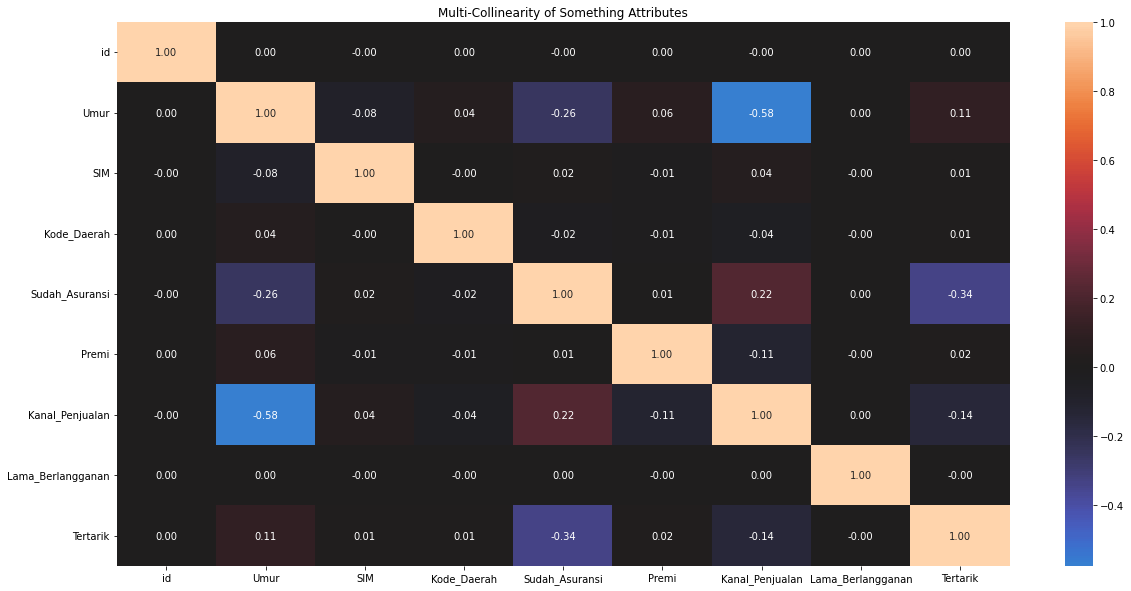

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_copy_train.corr(), center=0, annot=True, fmt=".2f")
ax.set_title('Multi-Collinearity of Something Attributes')

## Drop kolom

In [101]:
# drop kategori id
df_copy_train.drop(['id'], axis=1, inplace=True)
df_copy_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Handle Diplicate dan replace nan

In [102]:
# Menggunakan isna untuk melihat nilai null
df_copy_train.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [103]:
# Menggunakan dropna untuk drop data null
# dan menghilangkan data duplicates
df_copy_train = df_copy_train.dropna()
df_copy_train = df_copy_train.drop_duplicates(keep='first')
df_copy_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Lebel encoder

In [104]:
# Data kategorial bisa dibuah menjadi data yang meniliki nilai 1 dan 0
cleanup = { 'Jenis_Kelamin': {'Pria': 1, 'Wanita': 0}, 
            'Kendaraan_Rusak': {'Tidak': 0, 'Pernah':1},
            'Umur_Kendaraan': {'< 1 Tahun': 0, '1-2 Tahun': 1, '> 2 Tahun': 2}}
 
df_copy_train = df_copy_train.replace(cleanup)
df_copy_train


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
3,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
5,1,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
8,0,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,0,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0,0
285827,0,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0,0
285828,0,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0,0
285829,1,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0,0


## Hapus Outliers

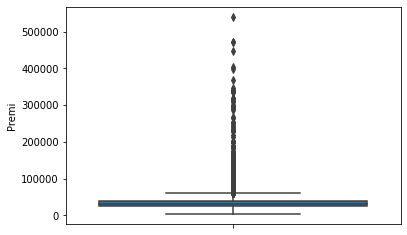

In [105]:
# boxplot untuk kategori Premi
sns. boxplot (y=df_copy_train['Premi'])
plt.show()

<function matplotlib.pyplot.show>

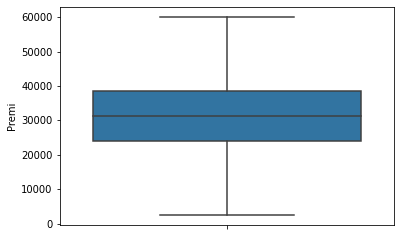

In [106]:
df_copy_train.drop(df_copy_train.loc[df_copy_train['Premi']>=60000].index, inplace=True)
sns.boxplot (y=df_copy_train['Premi'])
plt.show

In [107]:
df_train_data = df_copy_train.loc[:,['Jenis_Kelamin', 'Umur','Kode_Daerah','Umur_Kendaraan','Kendaraan_Rusak','Premi', 'Tertarik']]
df_train_data

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,0,30.0,33.0,0,0,28029.0,0
1,1,48.0,39.0,2,1,25800.0,0
3,0,58.0,48.0,1,0,2630.0,0
5,1,21.0,35.0,0,0,22735.0,0
8,0,20.0,8.0,0,0,30786.0,0
...,...,...,...,...,...,...,...
285826,0,23.0,4.0,0,0,25988.0,0
285827,0,21.0,46.0,0,0,44686.0,0
285828,0,23.0,50.0,0,0,49751.0,0
285829,1,68.0,7.0,1,0,30503.0,0


## Split data

In [108]:
#data split data train
x_train = df_train_data.drop('Tertarik', axis = 1)
y_train = df_train_data['Tertarik']

## Standarisasi Min Max Scaling

In [109]:
#Nornalisasi data x_train
def scaler(x_train):
  return (x_train - x_train.min())/(x_train.max() - x_train.min())

In [110]:
normal_x_train = scaler(x_train)
normal_x_train

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,0.0,0.153846,0.634615,0.0,0.0,0.442761
1,1.0,0.430769,0.750000,1.0,1.0,0.403905
3,0.0,0.584615,0.923077,0.5,0.0,0.000000
5,1.0,0.015385,0.673077,0.0,0.0,0.350475
8,0.0,0.000000,0.153846,0.0,0.0,0.490822
...,...,...,...,...,...,...
285826,0.0,0.046154,0.076923,0.0,0.0,0.407182
285827,0.0,0.015385,0.884615,0.0,0.0,0.733130
285828,0.0,0.046154,0.961538,0.0,0.0,0.821424
285829,1.0,0.738462,0.134615,0.5,0.0,0.485889


# Preprocessing Data Test

In [111]:
# Input dataframe training
df2 = pd.read_csv('kendaraan_test.csv')
df2

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [112]:
# Copy Data untuk data preprocessing
df_copy_test = df2.copy()
pd.set_option('display.max_rows', 20)
df_copy_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## Handle Diplicate dan replace nan

In [113]:
# Menggunakan dropna untuk drop data null
# dan menghilangkan data duplicates

df_copy_test = df_copy_test.dropna()
df_copy_test = df_copy_test.drop_duplicates(keep='first')
df_copy_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


## Lebel encoder

In [114]:
# Data kategorial bisa dibuah menjadi data yang meniliki nilai 1 dan 0

cleanup = { 'Jenis_Kelamin': {'Pria': 1, 'Wanita': 0}, 
            'Kendaraan_Rusak': {'Tidak': 0, 'Pernah':1},
            'Umur_Kendaraan': {'< 1 Tahun': 1, '1-2 Tahun': 2, '> 2 Tahun':3}}
 
df_copy_test = df_copy_test.replace(cleanup)
df_copy_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,2,1,46963,26,145,0
1,1,22,1,47,1,1,0,39624,152,241,0
2,1,24,1,28,1,1,0,110479,152,62,0
3,1,46,1,8,1,2,0,36266,124,34,0
4,1,35,1,23,0,2,1,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,1,61,1,46,0,3,1,31039,124,67,0
47635,1,41,1,15,0,2,1,2630,157,232,0
47636,1,24,1,29,1,1,0,33101,152,211,0
47637,1,59,1,30,0,2,1,37788,26,239,1


## Hapus Outliers

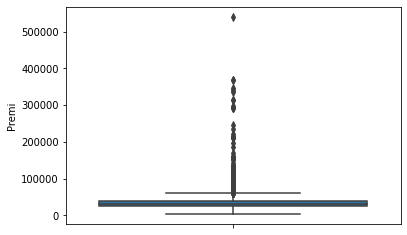

In [115]:
# boxplot untuk kategori Premi
sns. boxplot (y=df_copy_test['Premi'])
plt.show()

<function matplotlib.pyplot.show>

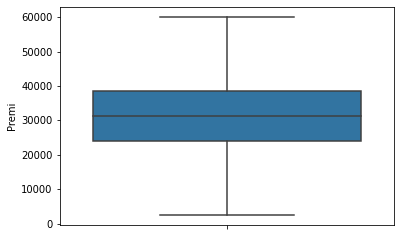

In [116]:
df_copy_test.drop(df_copy_test.loc[df_copy_test['Premi']>=60000].index, inplace=True)
sns.boxplot (y=df_copy_test['Premi'])
plt.show

In [117]:
df_test_data = df_copy_test.loc[:,['Jenis_Kelamin', 'Umur','Kode_Daerah','Umur_Kendaraan','Kendaraan_Rusak','Premi', 'Tertarik']]
df_test_data

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,0,49,8,2,1,46963,0
1,1,22,47,1,0,39624,0
3,1,46,8,2,0,36266,0
4,1,35,23,2,1,26963,0
5,1,26,28,1,0,42721,0
...,...,...,...,...,...,...,...
47634,1,61,46,3,1,31039,0
47635,1,41,15,2,1,2630,0
47636,1,24,29,1,0,33101,0
47637,1,59,30,2,1,37788,1


## Split data

In [118]:
#data split data train
x_test = df_test_data.drop('Tertarik', axis = 1)
y_test = df_test_data['Tertarik']

## Standarisasi Min Max Scaling

In [119]:
#Nornalisasi data x_test
def scaler(x_test):
  return (x_test - x_test.min())/(x_test.max() - x_test.min())

In [120]:
normal_x_test = scaler(x_test)
normal_x_test

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,0.0,0.446154,0.153846,0.5,1.0,0.772796
1,1.0,0.030769,0.903846,0.0,0.0,0.644866
3,1.0,0.400000,0.153846,0.5,0.0,0.586330
4,1.0,0.230769,0.442308,0.5,1.0,0.424164
5,1.0,0.092308,0.538462,0.0,0.0,0.698851
...,...,...,...,...,...,...
47634,1.0,0.630769,0.884615,1.0,1.0,0.495215
47635,1.0,0.323077,0.288462,0.5,1.0,0.000000
47636,1.0,0.061538,0.557692,0.0,0.0,0.531159
47637,1.0,0.600000,0.576923,0.5,1.0,0.612861


# Klasifikasi Naive Bayes (Done)

In [121]:
naive = GaussianNB()
naive.fit(normal_x_train, y_train)
y_predict_naive = naive.predict(normal_x_test)

In [122]:
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec
from sklearn import metrics

#Henghitung accuracy

print("Naive bayes\n")
print("F1-SCORE ",f1(y_test, y_predict_naive, average = 'macro'))
print("ACCURACY ",acc(y_test, y_predict_naive))
print("PRECISION ",pr(y_test, y_predict_naive, average = 'macro'))
print("RECALL", rec(y_test, y_predict_naive, average = 'macro'))

Naive bayes

F1-SCORE  0.6147962185727969
ACCURACY  0.7244229434224227
PRECISION  0.6182520861042653
RECALL 0.7488371529284054


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_naive))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     40462
           1       0.28      0.78      0.41      5634

    accuracy                           0.72     46096
   macro avg       0.62      0.75      0.61     46096
weighted avg       0.88      0.72      0.77     46096



# K-nearest neighbors (Done)

In [124]:
KKN = KNeighborsClassifier(n_neighbors=5)
KKN.fit(normal_x_train, y_train)
y_predict_knn = KKN.predict(normal_x_test)

In [125]:
print("KNN\n")
print("F1-SCORE ",f1(y_test, y_predict_knn, average = 'macro'))
print("ACCURACY ",acc(y_test, y_predict_knn))
print("PRECISION ",pr(y_test, y_predict_knn, average = 'macro'))
print("RECALL", rec(y_test, y_predict_knn, average = 'macro'))

KNN

F1-SCORE  0.5616550885694127
ACCURACY  0.8551718153418951
PRECISION  0.5998226666312687
RECALL 0.552054898334601


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     40462
           1       0.31      0.15      0.20      5634

    accuracy                           0.86     46096
   macro avg       0.60      0.55      0.56     46096
weighted avg       0.82      0.86      0.83     46096



# Decision Tree (Done)

In [127]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normal_x_train, y_train)
y_predict_tree = dec_tree.predict(normal_x_test)

In [128]:
print("DecisionTree\n")
print("F1-SCORE ",f1(y_test, y_predict_tree, average = 'macro'))
print("ACCURACY ",acc(y_test, y_predict_tree))
print("PRECISION ",pr(y_test, y_predict_tree, average = 'macro'))
print("RECALL", rec(y_test, y_predict_tree, average = 'macro'))

DecisionTree

F1-SCORE  0.5870596020466259
ACCURACY  0.8289222492190211
PRECISION  0.5904580050164883
RECALL 0.5841586035566804


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_tree))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     40462
           1       0.28      0.26      0.27      5634

    accuracy                           0.83     46096
   macro avg       0.59      0.58      0.59     46096
weighted avg       0.82      0.83      0.83     46096



# Random Forest (Done)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
hutan = RandomForestClassifier()
hutan.fit(normal_x_train, y_train)
y_predict_hutan = hutan.predict(normal_x_test)

In [ ]:
print("Random Forest\n")
print("F1-SCORE ",f1(y_test, y_predict_hutan, average = 'macro'))
print("ACCURACY ",acc(y_test, y_predict_hutan))
print("PRECISION ",pr(y_test, y_predict_hutan, average = 'macro'))
print("RECALL", rec(y_test, y_predict_hutan, average = 'macro'))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_hutan))

# Evaluasi

In [ ]:
print("Accuracy Naive Bayes :",acc(y_test,y_predict_naive))
print("Accuracy KNN :",acc(y_test,y_predict_knn))
print("Accuracy Decision Tree :", acc(y_test,y_predict_tree))
print("Accuracy Random Forest :", acc(y_test,y_predict_hutan))